# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are?
    C) Can you change color of one of them?
    D) Can you segment the leaves?
    
    
# Weekly project part 2
    A) Can you cut man from image "itssp.png" and put him in another image?
    B) Can you make the cutout better with erroding/dialating?


In [1]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

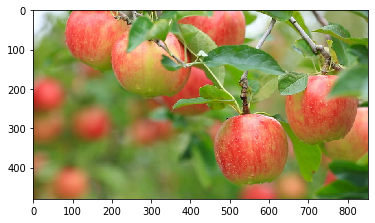

In [2]:
## part one
path = "appletree.jpg"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

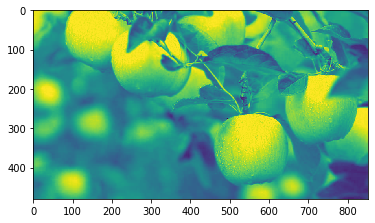

In [3]:
plt.imshow(r)

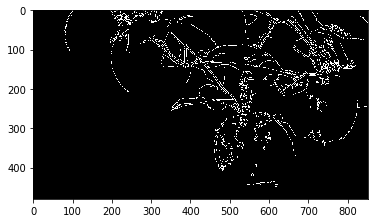

In [4]:
edged = cv2.Canny(image, 10, 300)
plt.imshow(edged, cmap='gray')

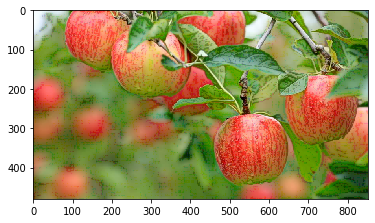

In [5]:
# sharpen the image
kernel = (11,11)
blur = cv2.GaussianBlur(image, kernel, 5)
plt.imshow(blur)
sub = image-blur
sharp = cv2.addWeighted(image, 1, sub, -0.1, 0);
plt.imshow(sharp)

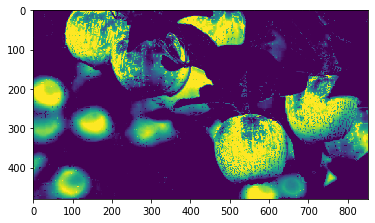

In [6]:
# adjust contrast
con = cv2.addWeighted(sharp, 1, sharp, 1.5, -255);
con = cv2.addWeighted(con[:,:,0], 1, con[:,:,1], -1, 0); # substract white
plt.imshow(con)

In [7]:
#gray = cv2.cvtColor(con, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray, cmap='gray')

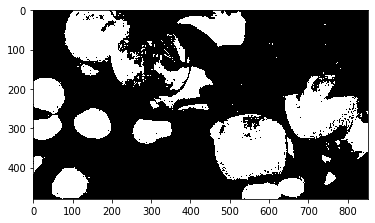

In [8]:
threshold =100
threshold_value = 255
thresh = cv2.threshold(con, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
thresh = -thresh+255
plt.imshow(thresh, cmap='gray')

There are 17 apples in the image!


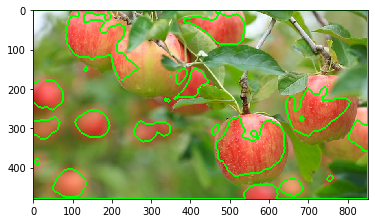

In [9]:
# segment and count
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 3)
#mask = cv2.dilate(mask, None, iterations = 5)
#plt.imshow(mask, cmap='gray')
thresh = -mask+255
#thresh = mask
#plt.imshow(thresh, cmap='gray')
thresh = cv2.medianBlur(thresh, 15)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 255, 0), 3)
plt.imshow(output)
print('There are '+str(len(cnts))+' apples in the image!')

50
403
135
475


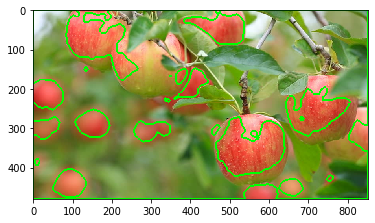

In [10]:
# change the color of one apple
obj = cnts[3]
#cv2.drawContours(output, [c], -1, (255, 0, 0), 3)
#print(obj)
#plt.imshow(output)
x = obj[:,0][:,0]
y = obj[:,0][:,1]
print(min(x))
print(min(y))
print(max(x))
print(max(y))
op = output.copy()
cv2.drawContours(op, cnts, 12, (0,255,0), -1)
plt.imshow(op)

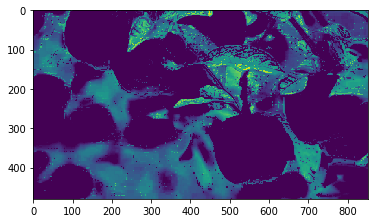

In [11]:
## leaves
# adjust contrast
con = cv2.addWeighted(sharp, 1, sharp, 1.5, -255);
con = cv2.addWeighted(con[:,:,1], 1, con[:,:,0], -1, 0); # substract white
plt.imshow(con)

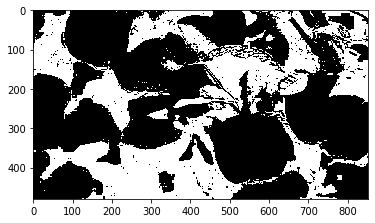

In [12]:
threshold =30
threshold_value = 255
thresh = cv2.threshold(con, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
thresh = -thresh+255
plt.imshow(thresh, cmap='gray')

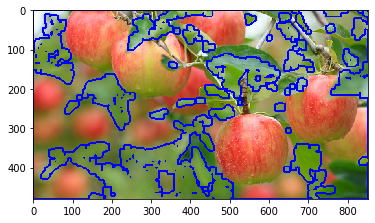

In [13]:
# segment
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
mask = cv2.dilate(mask, None, iterations = 5)
#plt.imshow(mask, cmap='gray')
thresh = -mask+255
#thresh = mask
#plt.imshow(thresh, cmap='gray')
#thresh = cv2.medianBlur(thresh, 15)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 255), 3)
plt.imshow(output)

[255 142 104]
There are 20 apples in the image!


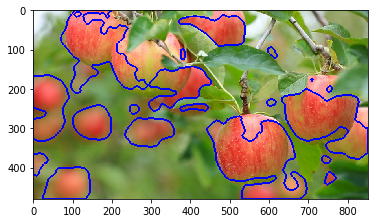

In [14]:
## maybe we can do with channels!
# for the apple
pix = image[350,550,:]
#pix = image[380, 100, :]
print(pix)
mask = cv2.inRange(image, np.array([135, 0, 0]), np.array([255, 150,255]))
mask = cv2.erode(mask, None, iterations = 3)
mask = cv2.dilate(mask, None, iterations = 3)
mask = cv2.medianBlur(mask, 15)
cnts = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 255), 3)
plt.imshow(output)
print('There are '+str(len(cnts))+' apples in the image!')

[ 96 120  46]


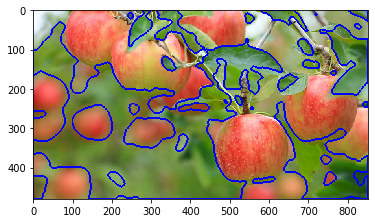

In [15]:
# for the leaves
#pix = image[350,550,:]
pix = image[380, 100, :]
print(pix)
mask = cv2.inRange(image, np.array([0, 70, 0]), np.array([135, 255,255]))
mask = cv2.erode(mask, None, iterations = 3)
mask = cv2.dilate(mask, None, iterations = 3)
mask = cv2.medianBlur(mask, 15)
cnts = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 255), 3)
plt.imshow(output)

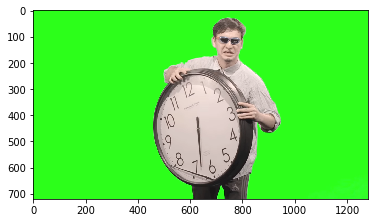

In [16]:
## part 2
path = "ittsp.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)
(h, w, d) = image.shape

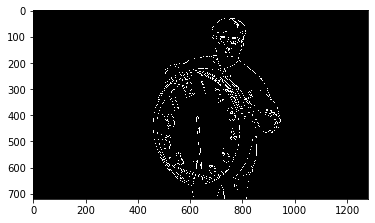

In [17]:
edged = cv2.Canny(image, 100, 300)
plt.imshow(edged, cmap='gray')

In [ ]:
# cut the man
pix = image[0, 0, :]
pix = image[707, 1139, :]
print(pix)
mask = cv2.inRange(image, np.array([40, 250, 15]), np.array([55, 255,50]))
mask = -mask+255
cut = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cut)

In [ ]:
# add erode and dilate
mask = cv2.erode(mask, None, iterations = 9)
mask = cv2.dilate(mask, None, iterations = 3)
cut = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cut)

In [ ]:
path = "appletree.jpg"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
image = cv2.resize(image, (w,h))
plt.imshow(image)

In [ ]:
mask = -mask+255
blend = cv2.bitwise_and(image, image, mask=mask)
blend = cv2.add(blend, cut)
plt.imshow(blend)